# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [44]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key 

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [80]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

726

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [81]:
# Create base url
url = "http://api.openweathermap.org/data/2.5/weather?"

# Specify units
units = "imperial"

#Create query url 
query_url = f"{url}appid={api_key}&units={units}&q="

In [82]:
# Create empty lists to hold the data we need to retrieve from the API call
temp_max = []
humidity = []
cloudiness = []
wind_speed = []
lat = []
lon = []
country = []
cities_list = []

# Set the count and set values
count = 0
set = 1

In [83]:
# Create for loop that will retrieve data of interest from API
for city in cities:
    # Specify try statement for cases when city name doesn't exist
    try:
        print(f"Processing record {count} of Set {set} | {city} ")
        # Make an API call
        response = requests.get(query_url + city).json()
        
        # Add data to the every list based on its value
        cities_list.append(response["name"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        country.append(response["sys"]["country"])
        temp_max.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        count += 1 
        
        # Create if statement that counts number of processed city records
        if (count == 50):
            set += 1
            count = 0
            
    except KeyError:
        print("City not found. Skipping...")
        
print("------------") 
print("Data Retrieval Complete")      


Processing record 0 of Set 1 | poum 
Processing record 1 of Set 1 | busselton 
Processing record 2 of Set 1 | marica 
Processing record 3 of Set 1 | hithadhoo 
Processing record 4 of Set 1 | krasnoturansk 
Processing record 5 of Set 1 | kahului 
Processing record 6 of Set 1 | inuvik 
Processing record 7 of Set 1 | kapaa 
Processing record 8 of Set 1 | albany 
Processing record 9 of Set 1 | puerto ayora 
Processing record 10 of Set 1 | karaton 
Processing record 11 of Set 1 | bluff 
Processing record 12 of Set 1 | cape town 
Processing record 13 of Set 1 | palabuhanratu 
City not found. Skipping...
Processing record 13 of Set 1 | dunedin 
Processing record 14 of Set 1 | cherskiy 
Processing record 15 of Set 1 | vaini 
Processing record 16 of Set 1 | rikitea 
Processing record 17 of Set 1 | new norfolk 
Processing record 18 of Set 1 | faanui 
Processing record 19 of Set 1 | punta arenas 
Processing record 20 of Set 1 | jumla 
Processing record 21 of Set 1 | mataura 
Processing record 22 

Processing record 16 of Set 4 | namibe 
Processing record 17 of Set 4 | chokurdakh 
Processing record 18 of Set 4 | saint-augustin 
Processing record 19 of Set 4 | san quintin 
Processing record 20 of Set 4 | korla 
City not found. Skipping...
Processing record 20 of Set 4 | gobabis 
Processing record 21 of Set 4 | ponta delgada 
Processing record 22 of Set 4 | mandalgovi 
Processing record 23 of Set 4 | la ronge 
Processing record 24 of Set 4 | verkhnevilyuysk 
Processing record 25 of Set 4 | vila velha 
Processing record 26 of Set 4 | saint george 
Processing record 27 of Set 4 | bambanglipuro 
Processing record 28 of Set 4 | grand gaube 
Processing record 29 of Set 4 | hasaki 
Processing record 30 of Set 4 | elko 
Processing record 31 of Set 4 | turukhansk 
Processing record 32 of Set 4 | hami 
Processing record 33 of Set 4 | kingsport 
Processing record 34 of Set 4 | evensk 
Processing record 35 of Set 4 | khatanga 
Processing record 36 of Set 4 | tura 
Processing record 37 of Set 

Processing record 28 of Set 7 | otavalo 
Processing record 29 of Set 7 | boa vista 
Processing record 30 of Set 7 | westport 
Processing record 31 of Set 7 | tumannyy 
City not found. Skipping...
Processing record 31 of Set 7 | oyem 
Processing record 32 of Set 7 | kargasok 
Processing record 33 of Set 7 | bouna 
Processing record 34 of Set 7 | almenara 
Processing record 35 of Set 7 | komsomolskiy 
Processing record 36 of Set 7 | nikolskoye 
Processing record 37 of Set 7 | bauchi 
Processing record 38 of Set 7 | tashara 
Processing record 39 of Set 7 | skiros 
City not found. Skipping...
Processing record 39 of Set 7 | prince rupert 
Processing record 40 of Set 7 | kanye 
Processing record 41 of Set 7 | san patricio 
Processing record 42 of Set 7 | anaconda 
Processing record 43 of Set 7 | talnakh 
Processing record 44 of Set 7 | mata grande 
Processing record 45 of Set 7 | cordoba 
Processing record 46 of Set 7 | luderitz 
Processing record 47 of Set 7 | saint-pierre 
Processing reco

Processing record 0 of Set 11 | stornoway 
City not found. Skipping...
Processing record 0 of Set 11 | mitchell 
Processing record 1 of Set 11 | oussouye 
Processing record 2 of Set 11 | guabito 
Processing record 3 of Set 11 | jabinyanah 
Processing record 4 of Set 11 | amapa 
Processing record 5 of Set 11 | sayyan 
Processing record 6 of Set 11 | aflu 
City not found. Skipping...
Processing record 6 of Set 11 | salaberry-de-valleyfield 
Processing record 7 of Set 11 | gillette 
Processing record 8 of Set 11 | vagay 
Processing record 9 of Set 11 | barawe 
City not found. Skipping...
Processing record 9 of Set 11 | chaohu 
Processing record 10 of Set 11 | key west 
Processing record 11 of Set 11 | yurimaguas 
Processing record 12 of Set 11 | minsk 
Processing record 13 of Set 11 | russkiy kameshkir 
Processing record 14 of Set 11 | horni jiretin 
Processing record 15 of Set 11 | pyay 
Processing record 16 of Set 11 | ritchie 
Processing record 17 of Set 11 | paamiut 
Processing record

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [90]:
# Create Data Frame
weather_df = pd.DataFrame({
    "City": cities_list,
    "Cloudiness": cloudiness,
    "Country":country,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lon,
    "Max Temp":temp_max,
    "Wind Speed":wind_speed
    
})   

# Count number of received records 
weather_df.count()

City          653
Cloudiness    653
Country       653
Humidity      653
Lat           653
Lng           653
Max Temp      653
Wind Speed    653
dtype: int64

In [98]:
# Display the Data Frame
weather_df

,City,Cloudiness,Country,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Poum,56,MK,80,41.28,20.71,12.85,1.81
1,Busselton,0,AU,81,-33.64,115.35,74.32,11.77
2,Marica,0,BR,88,-22.92,-42.82,80.60,3.36
3,Hithadhoo,88,MV,100,-0.60,73.08,79.04,0.36
4,Krasnoturansk,56,RU,84,54.32,91.57,-0.41,4.47
5,Kahului,40,US,56,20.89,-156.47,84.02,10.29
6,Inuvik,90,CA,67,68.36,-133.71,-22.01,3.36
7,Kapaa,40,US,64,22.08,-159.32,78.98,12.75
8,Albany,20,US,61,42.65,-73.75,12.20,14.99
9,Puerto Ayora,48,EC,100,-0.74,-90.35,76.39,9.19


In [99]:
#Safe Data Frame
weather_df.to_csv(output_data_file, sep=',', header=True, index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

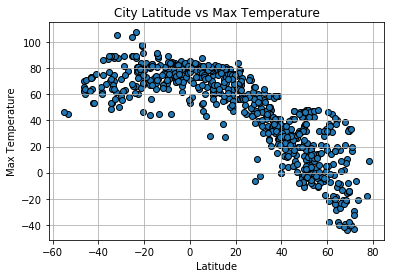

In [86]:
# Generate Title, x and y labels
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

# Generate the Plot
plt.scatter(lat, temp_max, marker="o", edgecolors="black")

#Create the grid
plt.grid(True)

# Save the Figure
plt.savefig("images/CityLatitudeVSMaxTemperature.png")

# Show the Figure
plt.show()

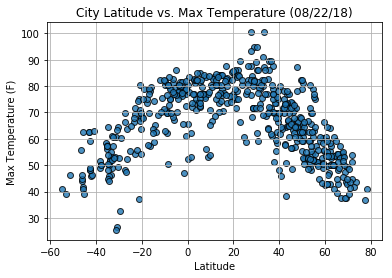

#### Latitude vs. Humidity Plot

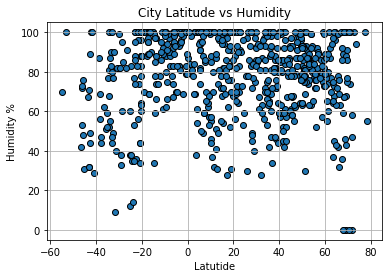

In [87]:
# Generate Title, x and y labels
plt.title("City Latitude vs Humidity")
plt.xlabel("Latutide")
plt.ylabel("Humidity %")

# Generate the Plot
plt.scatter(lat, humidity, marker="o",edgecolors="black")

#Create the grid
plt.grid(True)

# Save the Figure
plt.savefig("images/CityLatitudeVSHumidity.png")

# Show the Figure
plt.show()

#### Latitude vs. Cloudiness Plot

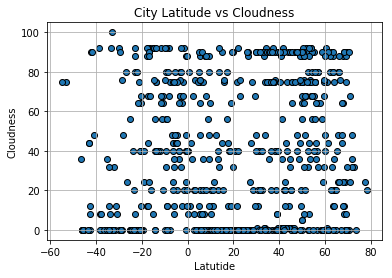

In [88]:
# Generate Title, x and y labels
plt.title("City Latitude vs Cloudness")
plt.xlabel("Latutide")
plt.ylabel("Cloudness")

#Generate the plot
plt.scatter(lat, cloudiness, marker="o", edgecolors="black")

#Create the grid
plt.grid(True)

# Save the Figure
plt.savefig("images/CityLatitudeVSCloudness.png")

# Show the Figure
plt.show()

#### Latitude vs. Wind Speed Plot

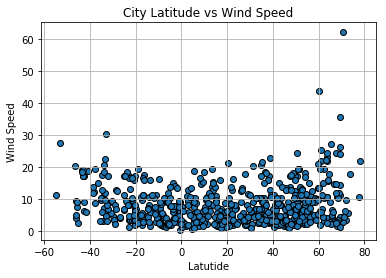

In [89]:
# Generate Title, x and y labels
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latutide")
plt.ylabel("Wind Speed")

#Generate the plot
plt.scatter(lat, wind_speed, marker="o", edgecolors="black")

#Create the grid
plt.grid(True)

# Save the Figure
plt.savefig("images/CityLatitudeVSWindSpeed.png")

# Show the Figure
plt.show()